# Airbnb Dataset

## Data Analysis and Visualization with Python


## Import libraries

In [1]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Import

In [2]:
# Load the dataset
data = pd.read_csv("Airbnb.csv")

Let's check the data

In [3]:
# Display the first few rows of the dataframe to understand its structure
data.head(5)

,id,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_id,host_response_time,review_scores_rating
0,3109,Observatoire,48.83191,2.31870,Entire home/apt,150.0,4,2019-10-24,0.05,1,327,3631,within a few hours,5.00
1,5396,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,146.0,374,2023-12-11,2.12,2,0,7903,within an hour,4.59
2,7397,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,140.0,343,2023-11-16,2.22,7,198,2626,within an hour,4.73
3,7964,Opéra,48.87417,2.34245,Entire home/apt,180.0,5,2015-09-14,0.03,1,25,22155,NaN,4.80
4,9359,Louvre,48.86006,2.34863,Entire home/apt,75.0,0,NaN,NaN,1,185,28422,NaN,NaN


In [4]:
#Check the number of rows and columns. Use .shape
data.shape

(74329, 14)

In [5]:
#What type of data do we get while using .shape? use .type()
data.dtypes

id                                  int64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
host_id                             int64
host_response_time                 object
review_scores_rating              float64
dtype: object

In [6]:
# To have more information about each column we can use 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74329 entries, 0 to 74328
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              74329 non-null  int64  
 1   neighbourhood                   74329 non-null  object 
 2   latitude                        74329 non-null  float64
 3   longitude                       74329 non-null  float64
 4   room_type                       74329 non-null  object 
 5   price                           67108 non-null  float64
 6   number_of_reviews               74329 non-null  int64  
 7   last_review                     56438 non-null  object 
 8   reviews_per_month               56438 non-null  float64
 9   calculated_host_listings_count  74329 non-null  int64  
 10  availability_365                74329 non-null  int64  
 11  host_id                         74329 non-null  int64  
 12  host_response_time              

In [7]:
data.describe()

,id,latitude,longitude,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_id,review_scores_rating
count,7.432900e+04,74329.000000,74329.000000,67108.000000,74329.000000,56438.000000,74329.000000,74329.000000,7.432900e+04,56527.000000
mean,4.016310e+17,48.864441,2.343779,221.161739,23.159897,1.126965,20.321342,105.546032,1.527328e+08,4.689374
std,4.385730e+17,0.018193,0.034027,662.165493,54.741564,1.437668,75.370713,125.189183,1.767908e+08,0.433012
min,3.109000e+03,48.816080,2.224640,8.000000,0.000000,0.010000,1.000000,0.000000,2.750000e+02,0.000000
25%,2.238236e+07,48.851220,2.322240,86.000000,1.000000,0.200000,1.000000,0.000000,1.690631e+07,4.570000
50%,5.139808e+07,48.865740,2.347263,129.000000,6.000000,0.640000,1.000000,45.000000,5.724306e+07,4.810000
75%,8.839130e+17,48.879210,2.369000,205.000000,22.000000,1.540000,2.000000,192.000000,2.681704e+08,5.000000
max,1.044192e+18,48.901670,2.467120,84420.000000,2636.000000,45.850000,628.000000,365.000000,5.503984e+08,5.000000


## Data Cleaning

First let's check the temporality of the data we work on

In [8]:
# Convert 'last_review' to datetime format and find the oldest and most recent dates
data['last_review'] = pd.to_datetime(data['last_review'])
#data.info()
# Look for the first and last date recorded in the dataframe using .max() .min()
Last_record=data['last_review'].max()
first_record=data['last_review'].min()
print(Last_record,first_record)

2023-12-13 00:00:00 2010-05-28 00:00:00


Check for missing values in key columns

In [9]:
# Check for missing values in key columns
data.isnull().sum()

id                                    0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              7221
number_of_reviews                     0
last_review                       17891
reviews_per_month                 17891
calculated_host_listings_count        0
availability_365                      0
host_id                               0
host_response_time                30106
review_scores_rating              17802
dtype: int64

In [10]:
#List all column 
data.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'host_id',
       'host_response_time', 'review_scores_rating'],
      dtype='object')

In [11]:
data_clean = data.copy()
data_clean.dropna(subset =['price','last_review','reviews_per_month','host_response_time','review_scores_rating'],inplace=True)
data_clean.isnull().sum()

id                                0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
host_id                           0
host_response_time                0
review_scores_rating              0
dtype: int64

In [12]:
# List all column names to ensure accurate references in analysis scripts
# Get column names as an Index object
column_names = data_clean.columns
column_names

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'host_id',
       'host_response_time', 'review_scores_rating'],
      dtype='object')

## Exploratory Data Analysis (EDA)

#### **Room Type Distribution**

Airbnb hosts can list entire homes/apartments, private, shared rooms, and more recently hotel rooms.

 How many types of accomodation do we have in the dataset?

In [13]:
# Calculate the number of listings per room type
number_listing_byroomtype  = data_clean.groupby(['room_type'], as_index=False)['calculated_host_listings_count'].sum().sort_values(by='calculated_host_listings_count', ascending=False)
number_listing_byroomtype 

,room_type,calculated_host_listings_count
0,Entire home/apt,716965
2,Private room,33875
1,Hotel room,3125
3,Shared room,2599


In [14]:
# Calculate the distribution of listings by room type
Roomtype_distribution = data_clean['room_type'].value_counts()
Roomtype_distribution

room_type
Entire home/apt    31340
Private room        3804
Hotel room           413
Shared room          203
Name: count, dtype: int64

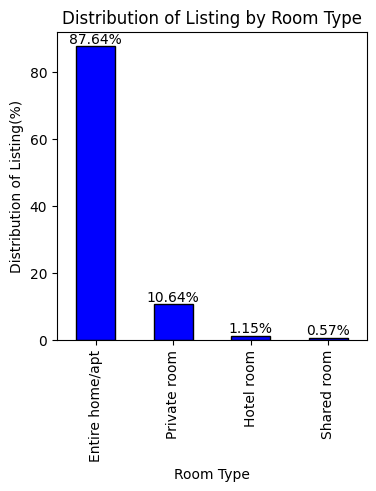

In [15]:
# Plotting the distribution of room types
plt.figure(figsize = (4,4))
distribution_by_room_type = data_clean['room_type'].value_counts(normalize=True) * 100
distribution_by_room_type
ax1 = distribution_by_room_type.plot(kind='bar', color = 'blue', edgecolor='black')
plt.xlabel('Room Type')
plt.ylabel('Distribution of Listing(%)')
plt.title('Distribution of Listing by Room Type')
for bars in ax1.containers:
    ax1.bar_label(bars,fmt='%.2f%%')

In [16]:
# Calculate the number of unique neighborhoods
number_unique_neighborhoods = data_clean['neighbourhood'].value_counts().nunique()
number_unique_neighborhoods

20

In [17]:
# Calculate listings count for each neighbourhood and sort in ascending order by count
Count_neighbourhood = data_clean['neighbourhood'].value_counts().sort_values()
Count_neighbourhood

neighbourhood
Louvre                  990
Gobelins               1098
Palais-Bourbon         1100
Luxembourg             1142
Élysée                 1237
Panthéon               1254
Observatoire           1263
Reuilly                1291
Hôtel-de-Ville         1424
Bourse                 1479
Opéra                  1792
Ménilmontant           1832
Temple                 1859
Passy                  1883
Buttes-Chaumont        1903
Batignolles-Monceau    2208
Entrepôt               2563
Vaugirard              2608
Popincourt             3090
Buttes-Montmartre      3744
Name: count, dtype: int64

**Pricing**

In [44]:
#Calculating the mean rental price
import numpy as np
rental_price = data_clean.loc[:,'price']
mean_rental_price = np.mean(rental_price)
print('The mean rental price is: ', round(mean_rental_price, 2))

The mean rental price is:  192.81


Do you consider it is a good way to approximate the average price? Could we do it in a better way?

In [19]:
# Grouping the data by neighborhood and calculate the average price
data_price_byneighborhood = data_clean.groupby(['neighbourhood'], as_index=False)['price'].mean().sort_values(by='price', ascending=False)
print('Neighbourhood by Average price :')
data_price_byneighborhood

Neighbourhood by Average price :


,neighbourhood,price
19,Élysée,306.732417
12,Palais-Bourbon,279.665455
7,Louvre,265.350505
8,Luxembourg,261.010508
14,Passy,247.668083
17,Temple,237.371167
6,Hôtel-de-Ville,229.365871
11,Opéra,223.917969
13,Panthéon,223.815789
1,Bourse,222.339419


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350')])

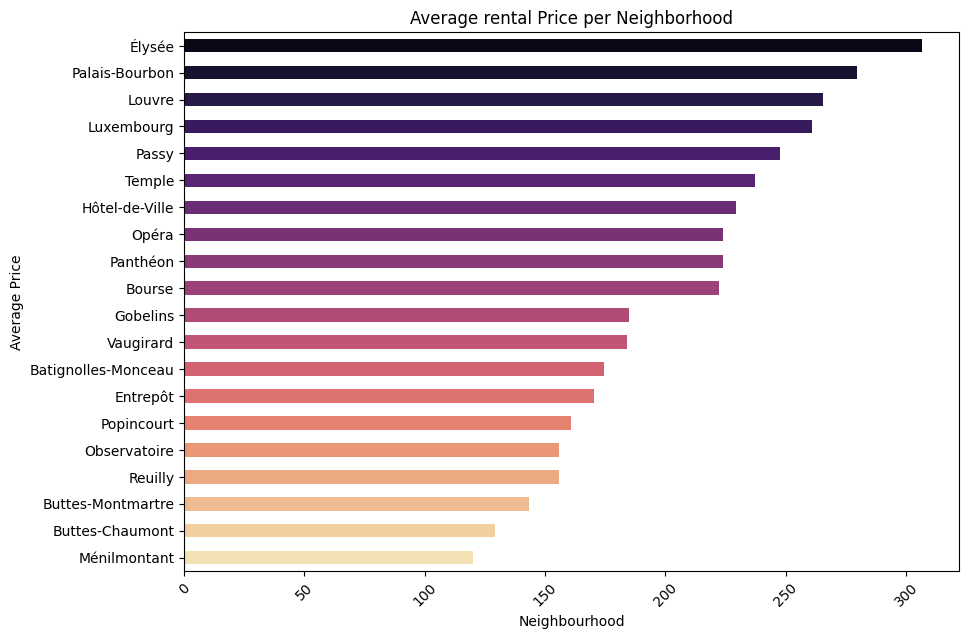

In [21]:
# Plotting the average price per neighborhood
plt.figure(figsize = (10,7))
sns.barplot(x = 'price' ,y ='neighbourhood',width = 0.5 ,data = data_price_byneighborhood,palette="magma")
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Average rental Price per Neighborhood')
plt.xticks(rotation=45)

Let's calculate the average price by room type

In [24]:
# Group by 'room_type' and calculate the average price
data_price_byroomtype = data_clean.groupby(['room_type'], as_index=False)['price'].mean().sort_values(by='price', ascending=False)
print('Room Type by Average price :')


# Rename columns for clarity
data_price_byroomtype.rename(columns = {'price':'Average Price'}, inplace = True)
data_price_byroomtype

Room Type by Average price :


,room_type,Average Price
1,Hotel room,252.179177
0,Entire home/apt,199.954882
2,Private room,134.769716
3,Shared room,56.285714


#### **Identifying High-Performing Listings**

Which listings in Airbnb's portfolio perform the best in terms of occupancy rates, revenue generation, and guest satisfaction?

**Host revenue generation**

Some Airbnb hosts have multiple listings.

A host may list separate rooms in the same apartment, or multiple apartments or homes available in their entirety.

Hosts with multiple listings are more likely to be running a business, are unlikely to be living in the property.

Imagine that we want to know how much the 10 hosts that earn the most per year earn.

In [25]:
# Create a new column 'potential_revenue' and calculate the potential annual revenue for each listing

# Group by year 
data_clean['potential_revenue'] = data_clean['price'] * 365

# Now, group by 'host_id' and sum up the potential revenue

#YOUR CODE
host_revenue = data_clean.groupby('host_id')['potential_revenue'].sum()

# Display the results

#YOUR CODE
top_10_hosts = host_revenue.sort_values(ascending=False).head(10)

top_10_hosts

host_id
33889201     64218100.0
26981054     22552985.0
277316912    20335610.0
77779136     19432235.0
7642792      19047160.0
50502817     14360560.0
50978178     13891170.0
335998296    13830580.0
51567288     12001200.0
156775524     9617385.0
Name: potential_revenue, dtype: float64

**Distribution of Listings per Host**

Apartment - how many apartments does each host own?

We'll use the *host_id* and *id*  to count how many listings each host manages.

Top Hosts by Listing Count:
host_id
50502817     317
50978178     224
26981054     207
7642792      174
314994947    171
33889201     156
460047164    115
51567288     115
335998296    108
436103373     98
Name: count, dtype: int64


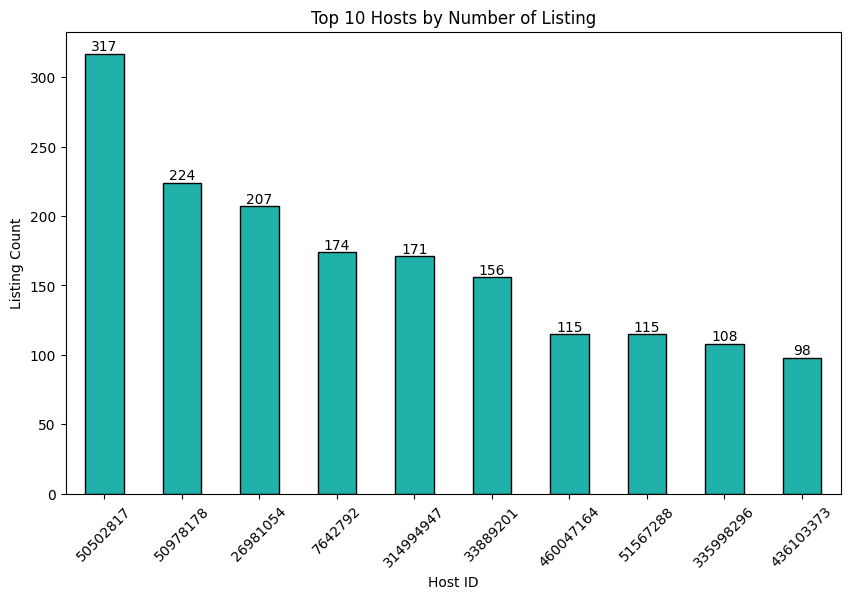

In [26]:
# Counting listings per host
top_hosts = data_clean['host_id'].value_counts().sort_values(ascending =False).head(10)
print('Top Hosts by Listing Count:')
print(top_hosts)

# For a more informative chart, we limit the visualization to the top 10 hosts
plt.figure(figsize=(10, 6))
ax = top_hosts.plot(kind='bar', color='lightseagreen', edgecolor='black')
#sns.barplot(x=top_hosts.index, y=top_hosts.values,width=0.5)
plt.xlabel('Host ID')
plt.ylabel('Listing Count')
plt.title('Top 10 Hosts by Number of Listing')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

What if we create a combined performance metric based on review scores and number of reviews ?

In [27]:
# Create a combined performance metric based on review scores and number of reviews

#YOUR CODE
data_clean['performance_metric'] = data_clean['review_scores_rating'] * data_clean['number_of_reviews']

# Group by host and calculate average performance

#YOUR CODE
average_performance_per_host = data_clean.groupby('host_id')['performance_metric'].mean()

# Identify top-performing hosts

#YOUR CODE
top_performing_hosts = average_performance_per_host.sort_values(ascending=False).head(10)

top_performing_hosts

host_id
3125405     5484.550
6811343     5035.580
44927614    4022.250
150876      3872.800
12737796    3776.695
22980352    3771.500
84901734    3625.235
5888840     3429.640
15998479    3413.150
57264667    3387.900
Name: performance_metric, dtype: float64

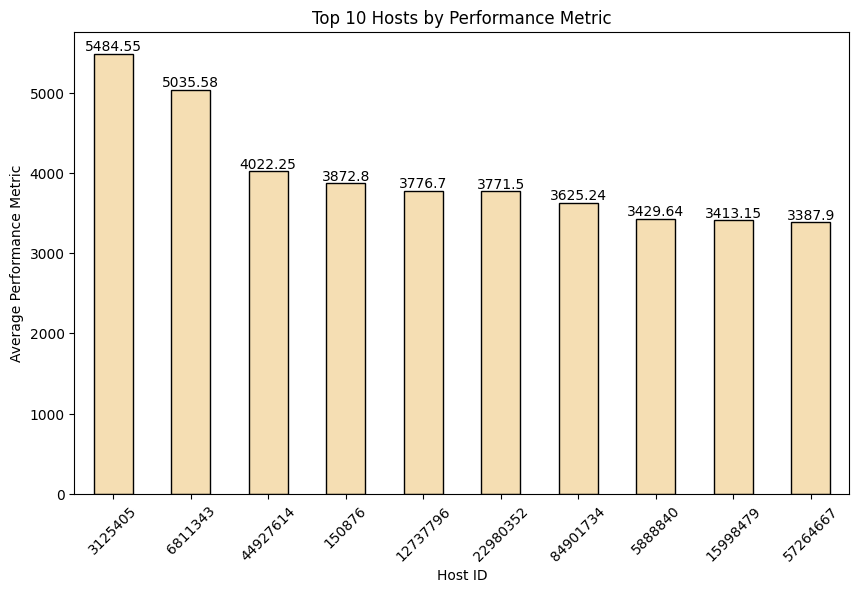

In [28]:
# Visualizing the top host performance
plt.figure(figsize=(10, 6))
ax = top_performing_hosts.plot(kind='bar', color='wheat', edgecolor='black')
#sns.barplot(x=top_hosts.index, y=top_hosts.values,width=0.5)
plt.xlabel('Host ID')
plt.ylabel('Average Performance Metric')
plt.title('Top 10 Hosts by Performance Metric')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

and if we create a new perfomance indicator assuming bookings as a measure of performance ?

In [30]:
# Calculate assumed bookings as a measure of performance

data_clean['assumed_bookings'] = data_clean['potential_revenue'] / (data_clean['price'] * 365)

# Group by 'host_id' to calculate total revenue and average reviews
host_performance_by_bookings = data_clean.groupby('host_id').agg(
    total_bookings=('assumed_bookings', 'sum'),
    total_revenue=('potential_revenue', 'sum'),
    average_reviews=('number_of_reviews', 'mean')
).reset_index()

# Top-performing hosts

#YOUR CODE
top_performing_hosts_by_bookings = host_performance_by_bookings.sort_values(by='total_bookings', ascending=False).head(10)

top_performing_hosts_by_bookings

,host_id,total_bookings,total_revenue,average_reviews
12198,50502817,317.0,14360560.0,12.548896
12244,50978178,224.0,13891170.0,37.441964
9000,26981054,207.0,22552985.0,36.811594
3758,7642792,174.0,19047160.0,16.074713
19752,314994947,171.0,9480875.0,1.350877
10179,33889201,156.0,64218100.0,4.833333
12316,51567288,115.0,12001200.0,33.521739
21892,460047164,115.0,2271030.0,1.791304
19968,335998296,108.0,13830580.0,20.009259
21416,436103373,98.0,7936560.0,19.683673


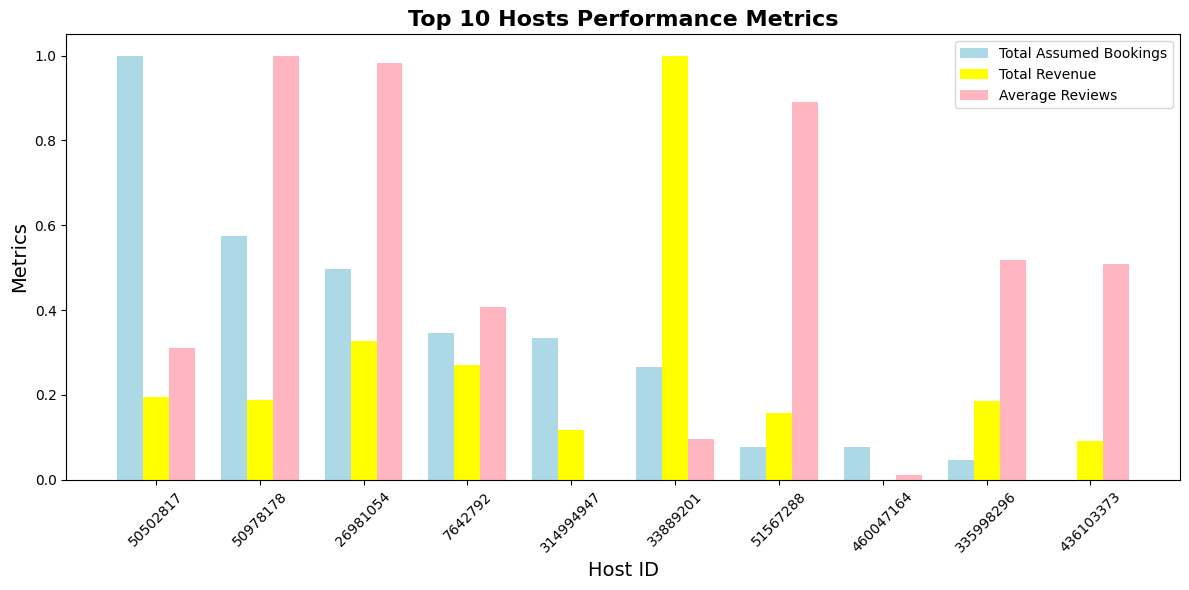

In [37]:
# Visualization of host performance metrics
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
column_names_to_normalize = ['total_bookings', 'total_revenue', 'average_reviews']
x = top_performing_hosts_by_bookings[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = top_performing_hosts_by_bookings.index)
top_performing_hosts_by_bookings[column_names_to_normalize] = df_temp
# Set the figure size
plt.figure(figsize=(12, 6))

# Define bar width and positions
bar_width = 0.25
indices = np.arange(len(top_performing_hosts_by_bookings['host_id']))

# Create bars for each metric
bars1 = plt.bar(indices, top_performing_hosts_by_bookings['total_bookings'], bar_width, label='Total Assumed Bookings', color='lightblue')
bars2 = plt.bar(indices + bar_width, top_performing_hosts_by_bookings['total_revenue'], bar_width, label='Total Revenue', color='yellow')
bars3 = plt.bar(indices + 2 * bar_width, top_performing_hosts_by_bookings['average_reviews'], bar_width, label='Average Reviews', color='lightpink')

# Adding labels and title
plt.xlabel('Host ID', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.title('Top 10 Hosts Performance Metrics', fontsize=16, fontweight='bold')
plt.xticks(indices + bar_width, top_performing_hosts_by_bookings['host_id'], rotation=45)
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

Is there a relationship between guest satisfaction and the host reponse time?

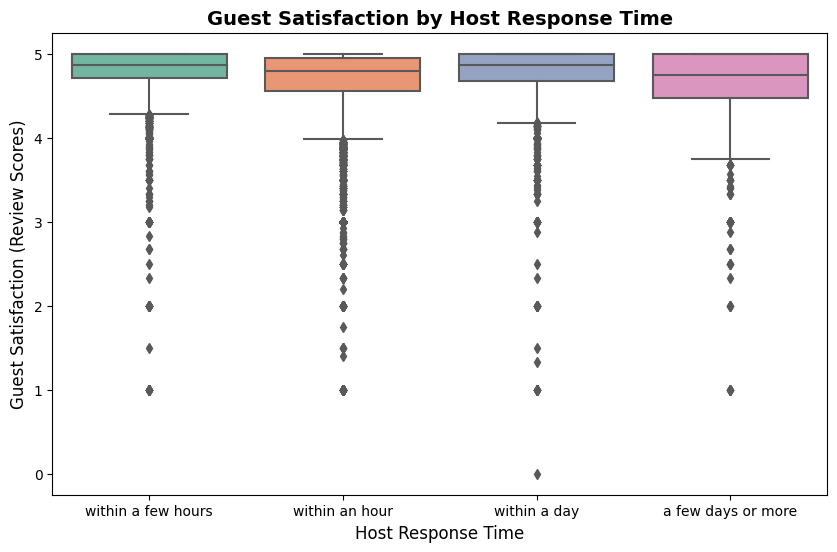

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_clean, x='host_response_time', y='review_scores_rating', palette='Set2')

# Adding titles and labels
plt.title('Guest Satisfaction by Host Response Time', fontsize=14, fontweight='bold')
plt.xlabel('Host Response Time', fontsize=12)
plt.ylabel('Guest Satisfaction (Review Scores)', fontsize=12)
plt.show()

Is there a difference between host satisfaction and the type of room?

In [39]:
# Analyze review scores by room type for patterns
data_reviewscore_byroomtype = data_clean.groupby(['room_type'], as_index=False)['review_scores_rating'].mean().sort_values(by='review_scores_rating', ascending=False)
print('Room Type by Average review score')
data_reviewscore_byroomtype
# Rename columns for clarity

#YOUR CODE
data_reviewscore_byroomtype.rename(columns={'review_scores_rating': 'average_review_score'}, inplace=True)

data_reviewscore_byroomtype

Room Type by Average review score


,room_type,average_review_score
0,Entire home/apt,4.709574
2,Private room,4.702203
3,Shared room,4.581773
1,Hotel room,4.547264


Price Over Time:
last_review
2012-01    145.000000
2012-05    150.000000
2012-10    293.000000
2013-08    149.000000
2014-04    110.000000
              ...    
2023-08    219.584885
2023-09    197.724712
2023-10    198.859550
2023-11    172.970500
2023-12    158.182697
Freq: M, Name: price, Length: 117, dtype: float64


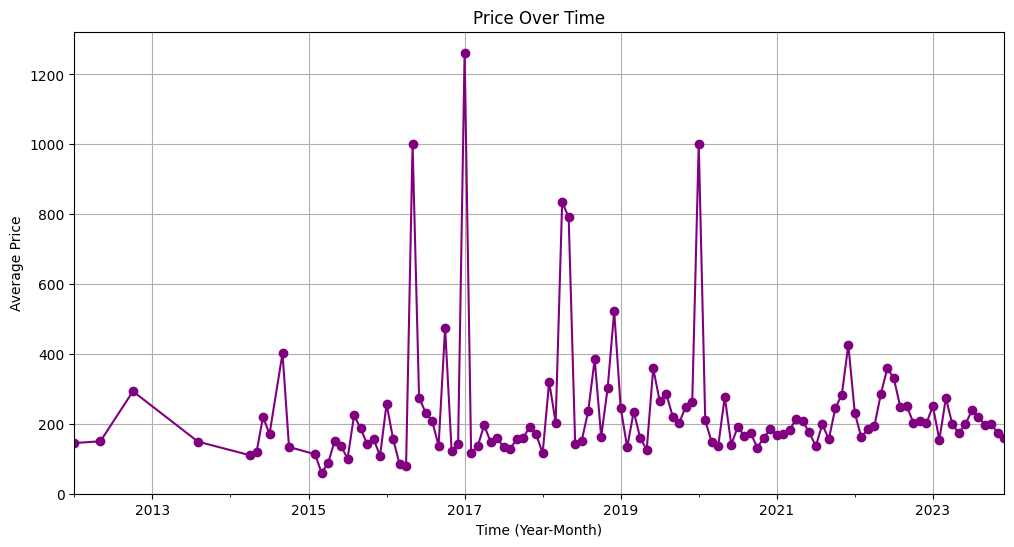

In [40]:
# Extract the month from the 'last_review' date

data_clean['last_review'] = pd.to_datetime(data_clean['last_review'])

# Aggregate data to find average price and count of listings per month

price_over_time = data_clean.groupby(data_clean['last_review'].dt.to_period("M"))['price'].mean()
print('Price Over Time:')
print(price_over_time)
# Plotting
plt.figure(figsize=(12, 6))
price_over_time.plot(kind='line', marker='o', color='purple')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Price')
plt.title('Price Over Time')
plt.grid(True)
plt.show()

Availability Over Time:
last_review
2012-01    223.000000
2012-05    104.000000
2012-10    363.000000
2013-08     28.000000
2014-04    126.000000
              ...    
2023-08    104.816539
2023-09    127.372075
2023-10    138.039475
2023-11    133.265401
2023-12    130.918667
Freq: M, Name: availability_365, Length: 117, dtype: float64


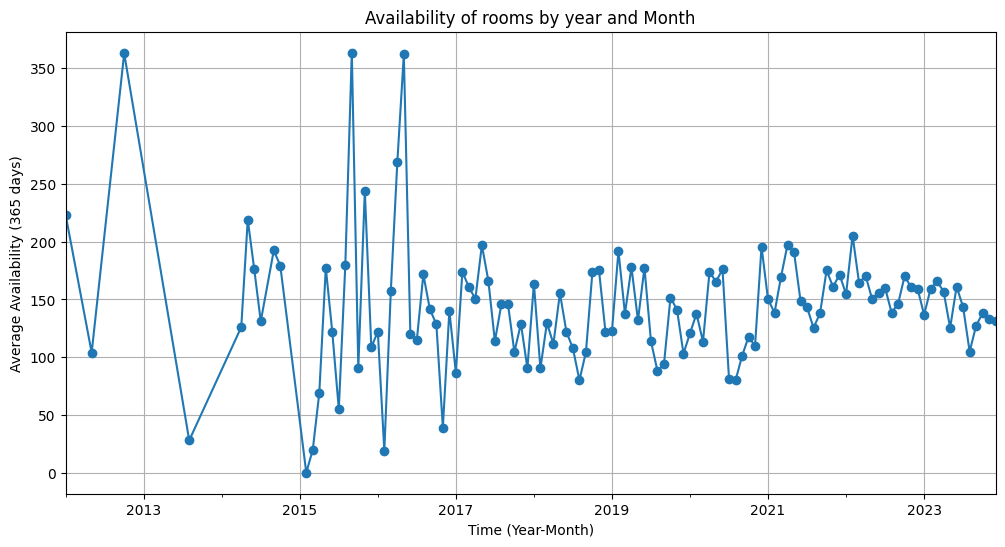

In [41]:
# Group by year and month
availability_over_time = data_clean.groupby(data_clean['last_review'].dt.to_period("M"))['availability_365'].mean()
print('Availability Over Time:')
print(availability_over_time)
plt.figure(figsize=(12, 6))
availability_over_time.plot(kind='line', marker='o')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Availability (365 days)')
plt.title('Availability of rooms by year and Month')
plt.grid(True)
plt.show()

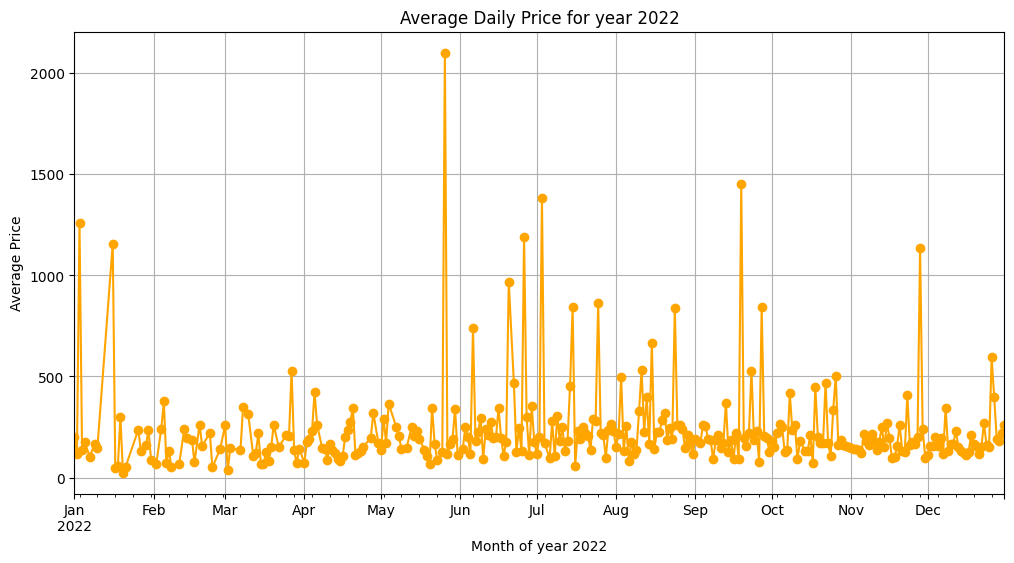

In [42]:
# Filter data for the years 2022 only

price_over_time_year = data_clean.groupby(data_clean['last_review'].dt.to_period("y"))['price'].mean()
price_over_time_year 
# Calculate the average daily price for this year

data_clean['year'] = data_clean['last_review'].dt.year
data_2022 = data_clean[data_clean['year'] == 2022]

average_daily_price_2022 = data_2022.groupby(data_2022['last_review'].dt.to_period("d"))['price'].mean()
average_daily_price_2022 

# Attempt to plot the evolution of average daily price for 2022
plt.figure(figsize=(12, 6))
average_daily_price_2022 .plot(kind='line', marker='o', color='orange')
plt.xlabel('Month of year 2022')
plt.ylabel('Average Price')
plt.title('Average Daily Price for year 2022')
plt.grid(True)
plt.show()

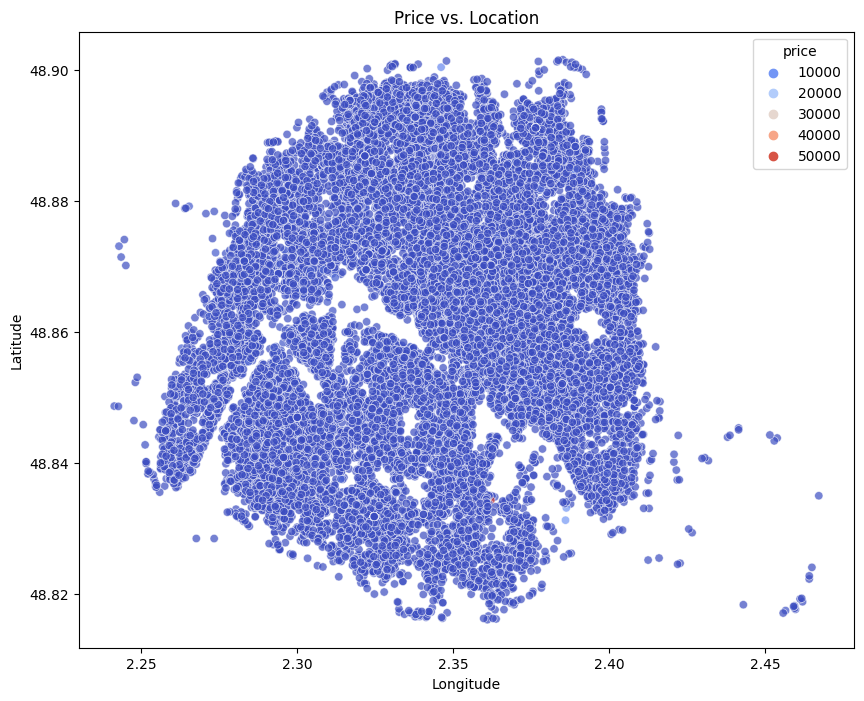

In [43]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data_clean, x='longitude', y='latitude', hue='price', palette='coolwarm', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price vs. Location')
plt.show()
